In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("/home/miri/Documents/bachelorthesis/plots")
from plot_utils import *

2025-02-17 18:07:08.181863: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-02-17 18:07:08.190514: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-02-17 18:07:08.193117: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-17 18:07:08.652875: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Max test accuracy of Standard is 86.14% with lr 0.00278
Max test accuracy of norm is 86.41% with p 3.4


Max test accuracy of cnorm is 86.03% with p 3.6
Max test accuracy of cnormu is 86.41% with p 3.2
Max test accuracy of gcstdu is 86.96% with p 3.6
Max test accuracy of wd is 85.03% with lambda 1.0000000000000004e-06


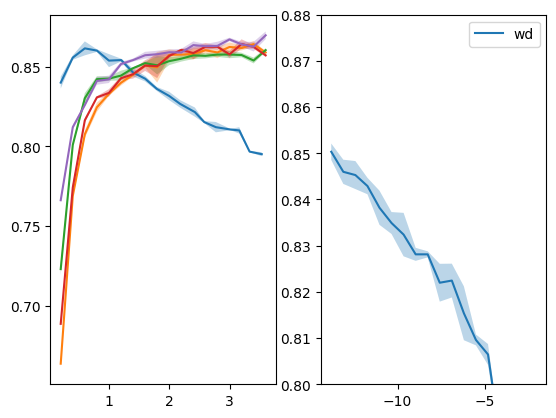

In [4]:
fig,axs = plt.subplots(ncols=2,nrows=1,sharey="col")

x,y,_ = plot_hyperparam_y(get_subexpspaths("../../data/adam_wbn/noreg"),
                               lambda subpath: np.sqrt(0.001/float(subpath)),lambda p : max_acc(get_stats(p,"test_stats")),axs[0], norm=False,label="noreg")

print("Max test accuracy of Standard is {0}% with lr {1}".format(round(100*y.max(),2),round(0.001/(x[y.argmax()]**2),6)))

x,y,_ = plot_hyperparam_y(get_subexpspaths("../../data/adam_wbn/norm",skip=lambda s : s.endswith("0")),
                               lambda subpath: float(subpath.split("_")[0]),lambda p : max_acc(get_stats(p,"test_stats")), axs[0], norm=False, label="norm")

print("Max test accuracy of norm is {0}% with p {1}".format(round(100*y.max(),2),x[y.argmax()]))

x,y,_ = plot_hyperparam_y(get_subexpspaths("../../data/adam_wbn/cnorm",skip=lambda s : s.endswith("0")),
                               lambda subpath: float(subpath.split("_")[0]),lambda p : max_acc(get_stats(p,"test_stats")), axs[0], norm=False, label="cnorm")

print("Max test accuracy of cnorm is {0}% with p {1}".format(round(100*y.max(),2),x[y.argmax()]))

x,y,_ = plot_hyperparam_y(get_subexpspaths("../../data/adam_wbn/cnormu",skip=lambda s : s.endswith("0")),
                               lambda subpath: float(subpath.split("_")[0]),lambda p : max_acc(get_stats(p,"test_stats")), axs[0], norm=False, label="cnormu")

print("Max test accuracy of cnormu is {0}% with p {1}".format(round(100*y.max(),2),x[y.argmax()]))


x,y,_ = plot_hyperparam_y(get_subexpspaths("../../data/adam_wbn/gcstdu",skip=lambda s : s.endswith("0")),
                               lambda subpath: float(subpath.split("_")[0]),lambda p : max_acc(get_stats(p,"test_stats")), axs[0], norm=False, label="gcstdu")

print("Max test accuracy of gcstdu is {0}% with p {1}".format(round(100*y.max(),2),x[y.argmax()]))

x,y,_ = plot_hyperparam_y(get_subexpspaths("../../data/adam_wbn/wd"),
                               lambda subpath: np.log(float(subpath)),lambda p : max_acc(get_stats(p,"test_stats")),axs[1], norm=False,label="wd")

print("Max test accuracy of wd is {0}% with lambda {1}".format(round(100*y.max(),2),np.exp(x[y.argmax()])))

ax = plt.gca()
ax.set_ylim(0.8,0.88)
plt.legend()

Text(0, 0.5, 'Validation accuracy')

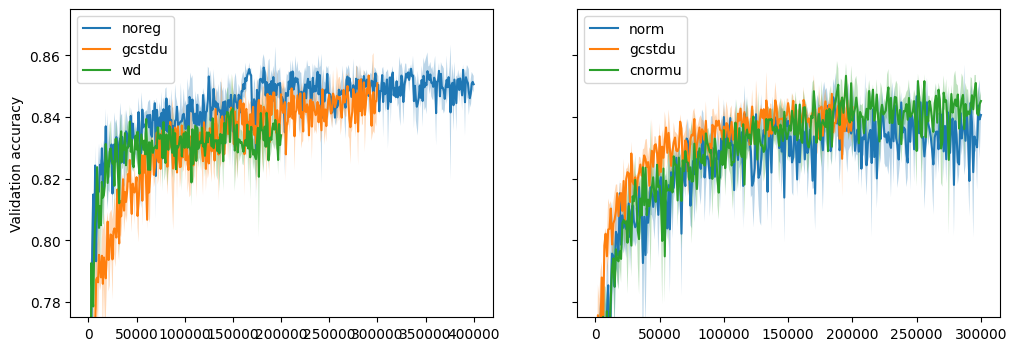

In [ ]:
fig,axs = plt.subplots(ncols=2,nrows=1,sharey="all")
fig.set_size_inches(12,4)
stats = get_stats("../../data/noreg/0.00278","test_stats")
plot_step_stat(stats["acc"],axs[0],label="noreg")

stats = get_stats("../../data/gcstdu/2.4_1","test_stats")
plot_step_stat(stats["acc"],axs[0],label="gcstdu")

stats = get_stats("../../data/wd/1e-06","test_stats")
plot_step_stat(stats["acc"],axs[0],label="wd")


stats = get_stats("../../data/norm/2.0_1","test_stats")
plot_step_stat(stats["acc"],axs[1],label="norm")

stats = get_stats("../../data/cnorm/2.0_1","test_stats")
plot_step_stat(stats["acc"],axs[1],label="gcstdu")

stats = get_stats("../../data/cnormu/2.4_1","test_stats")
plot_step_stat(stats["acc"],axs[1],label="cnormu")

axs[0].legend()
axs[1].legend()
axs[0].set_ylim(0.775,0.875) 
#ax.set_xlabel("Training step")
axs[0].set_ylabel("Validation accuracy")

[0.2        0.4        0.59976014 0.80064077 1.         1.20385853
 1.40028008 1.60128154 1.79605302 2.         2.1821789  2.42535625
 2.5819889  2.77350098 3.01511345 3.16227766 3.33333333 3.53553391]
[0.2        0.4        0.59976014 0.80064077 1.         1.20385853
 1.40028008 1.60128154 1.79605302 2.         2.1821789  2.42535625
 2.5819889  2.77350098 3.01511345 3.16227766 3.33333333 3.53553391]
[0.2 0.4 0.6 0.8 1.  1.2 1.4 1.6 1.8 2.  2.2 2.4 2.6 2.8 3.  3.2 3.4 3.6]
[0.2 0.4 0.6 0.8 1.  1.2 1.4 1.6 1.8 2.  2.2 2.4 2.6 2.8 3.  3.2 3.4 3.6]
[0.2 0.4 0.6 0.8 1.  1.2 1.4 1.6 1.8 2.  2.2 2.4 2.6 2.8 3.  3.2 3.4 3.6]
[0.2 0.4 0.6 0.8 1.  1.2 1.4 1.6 1.8 2.  2.2 2.4 2.6 2.8 3.  3.2 3.4 3.6]
[0.2 0.4 0.6 0.8 1.  1.2 1.4 1.6 1.8 2.  2.2 2.4 2.6 2.8 3.  3.2 3.4 3.6]
[0.2 0.4 0.6 0.8 1.  1.2 1.4 1.6 1.8 2.  2.2 2.4 2.6 2.8 3.  3.2 3.4 3.6]
[0.2 0.4 0.6 0.8 1.  1.2 1.4 1.6 1.8 2.  2.2 2.4 2.6 2.8 3.  3.2 3.4 3.6]
[0.2 0.4 0.6 0.8 1.  1.2 1.4 1.6 1.8 2.  2.2 2.4 2.6 2.8 3.  3.2 3.4 3.6]
[-13

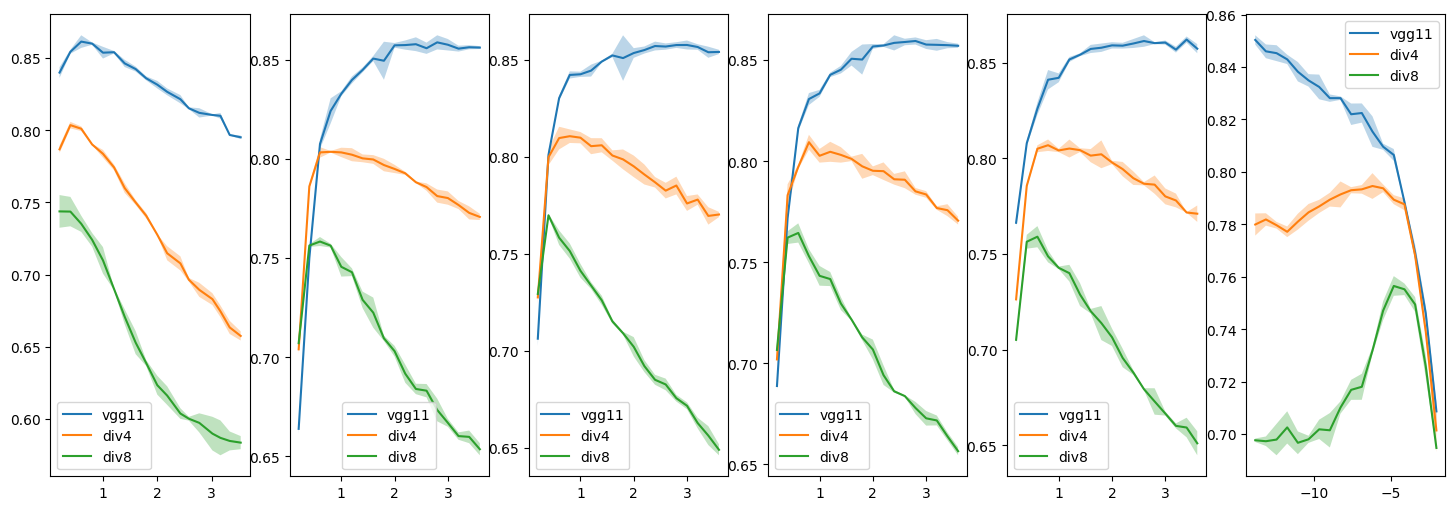

In [ ]:
fig,axs = plt.subplots(ncols=6,nrows=1,sharey="col")
fig.set_size_inches(18,6)
for ax,exp,x_fn in zip(axs,["noreg","norm","cnorm","cnormu","gcstdu","wd"],[lambda subpath : np.sqrt(0.001/float(subpath)), lambda subpath: float(subpath.split("_")[0]), lambda subpath: float(subpath.split("_")[0]), lambda subpath: float(subpath.split("_")[0]), lambda subpath: float(subpath.split("_")[0]),lambda subpath: np.log(float(subpath))]):
    
    x,y,y_normed = plot_hyperparam_y(get_subexpspaths(os.path.join("../../data",exp),skip=lambda p : not os.path.exists(os.path.join("../../data",exp,p,"test_stats","200000.pkl"))),x_fn,lambda p : max_acc(get_stats(p,"test_stats")), ax, "vgg11",norm=False)
    x_div4,y_div4,y_normed_div4 = plot_hyperparam_y(get_subexpspaths(os.path.join("../../data",exp+"_div4"),skip=lambda p : not os.path.exists(os.path.join("../../data",exp+"_div4",p,"test_stats","200000.pkl"))),x_fn,lambda p : max_acc(get_stats(p,"test_stats")), ax, "div4",norm=False)
    print(x)
    print(x_div4)
    x_div8,y_div8,y_normed_div8 = plot_hyperparam_y(get_subexpspaths(os.path.join("../../data",exp+"_div8"),skip=lambda p : not os.path.exists(os.path.join("../../data",exp+"_div8",p,"test_stats","200000.pkl"))),x_fn,lambda p : max_acc(get_stats(p,"test_stats")), ax, "div8",norm=False)
    ax.legend()

In [ ]:
hyps = ["0.4","0.6","0.8","1.0","1.2","1.4","1.6","1.8","2.0","2.2","2.4"]
for p in hyps:

    lr = str(round(0.001/(float(p)**2),5))
    p = p+"_1"

    plot_step_stat(get_stats(os.path.join("../../data/noreg",lr),"test_stats")["acc"],plt,label="noreg")
    plot_step_stat(get_stats(os.path.join("../../data/norm",p),"test_stats")["acc"],plt,label="norm")
    plot_step_stat(get_stats(os.path.join("../../data/cnorm",p),"test_stats")["acc"],plt,label="cnorm")
    plot_step_stat(get_stats(os.path.join("../../data/cnormu",p),"test_stats")["acc"],plt,label="cnormu")
    plot_step_stat(get_stats(os.path.join("../../data/gcstdu",p),"test_stats")["acc"],plt,label="gcstdu")
    plt.legend()
    plt.show()
    

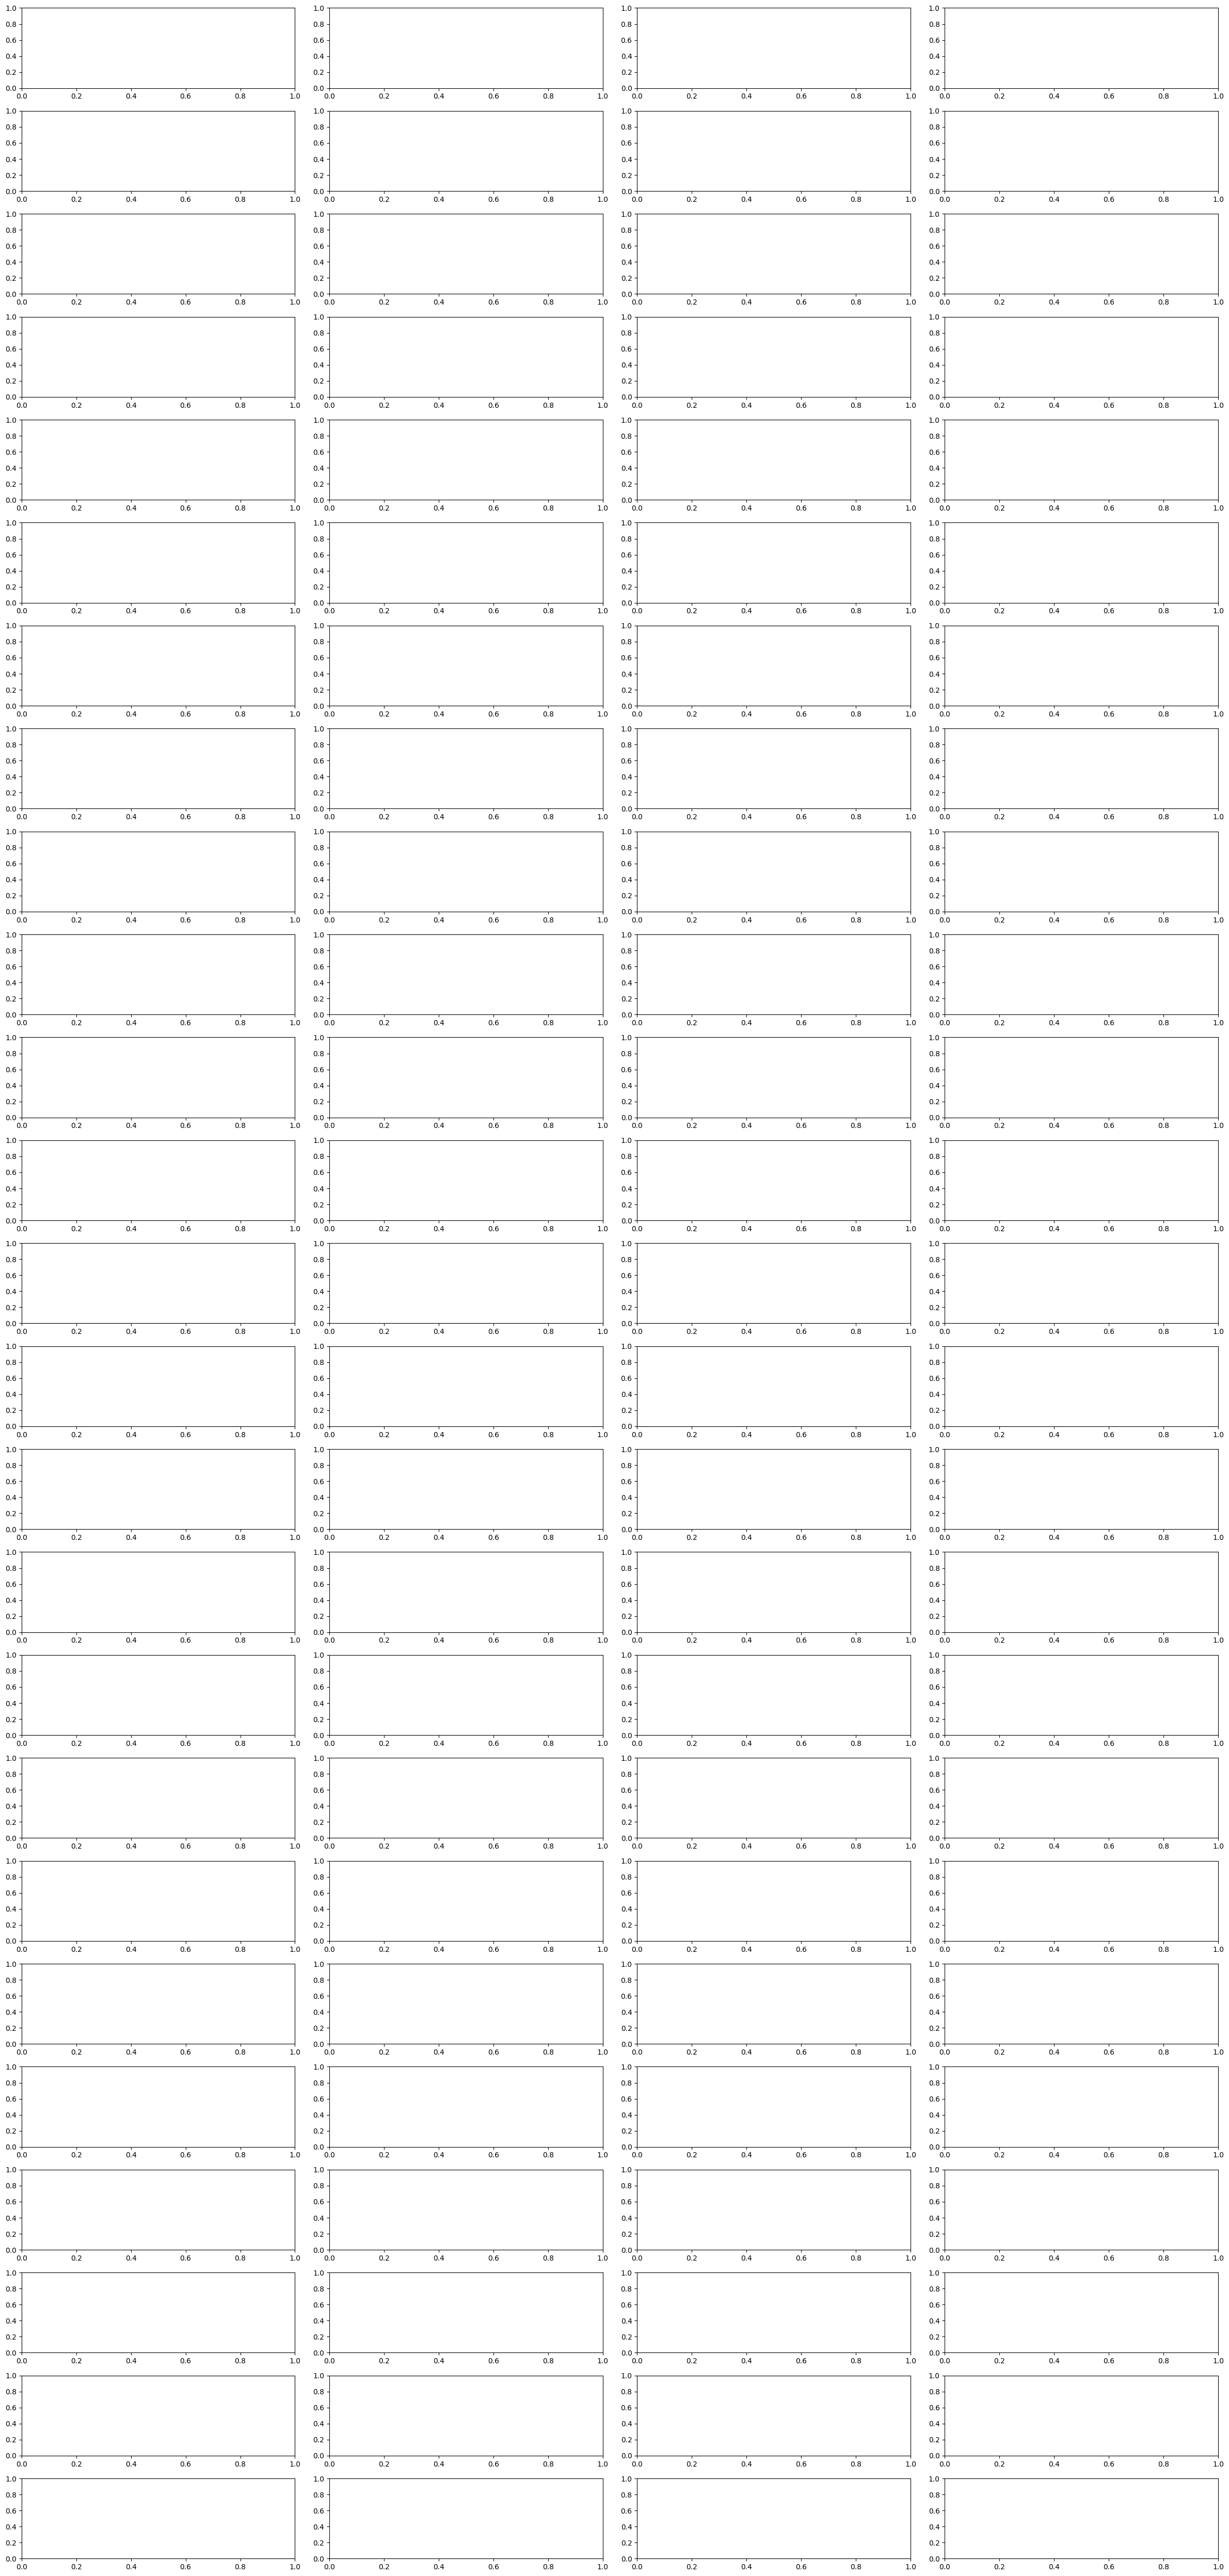

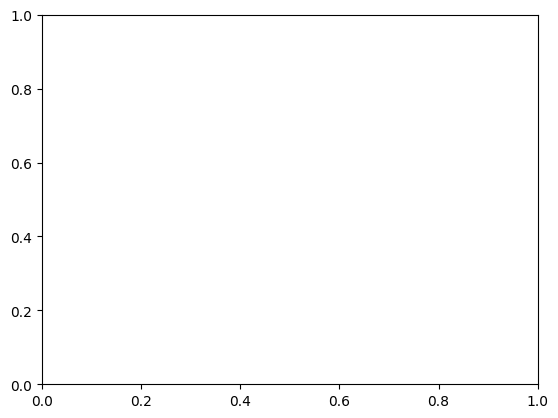

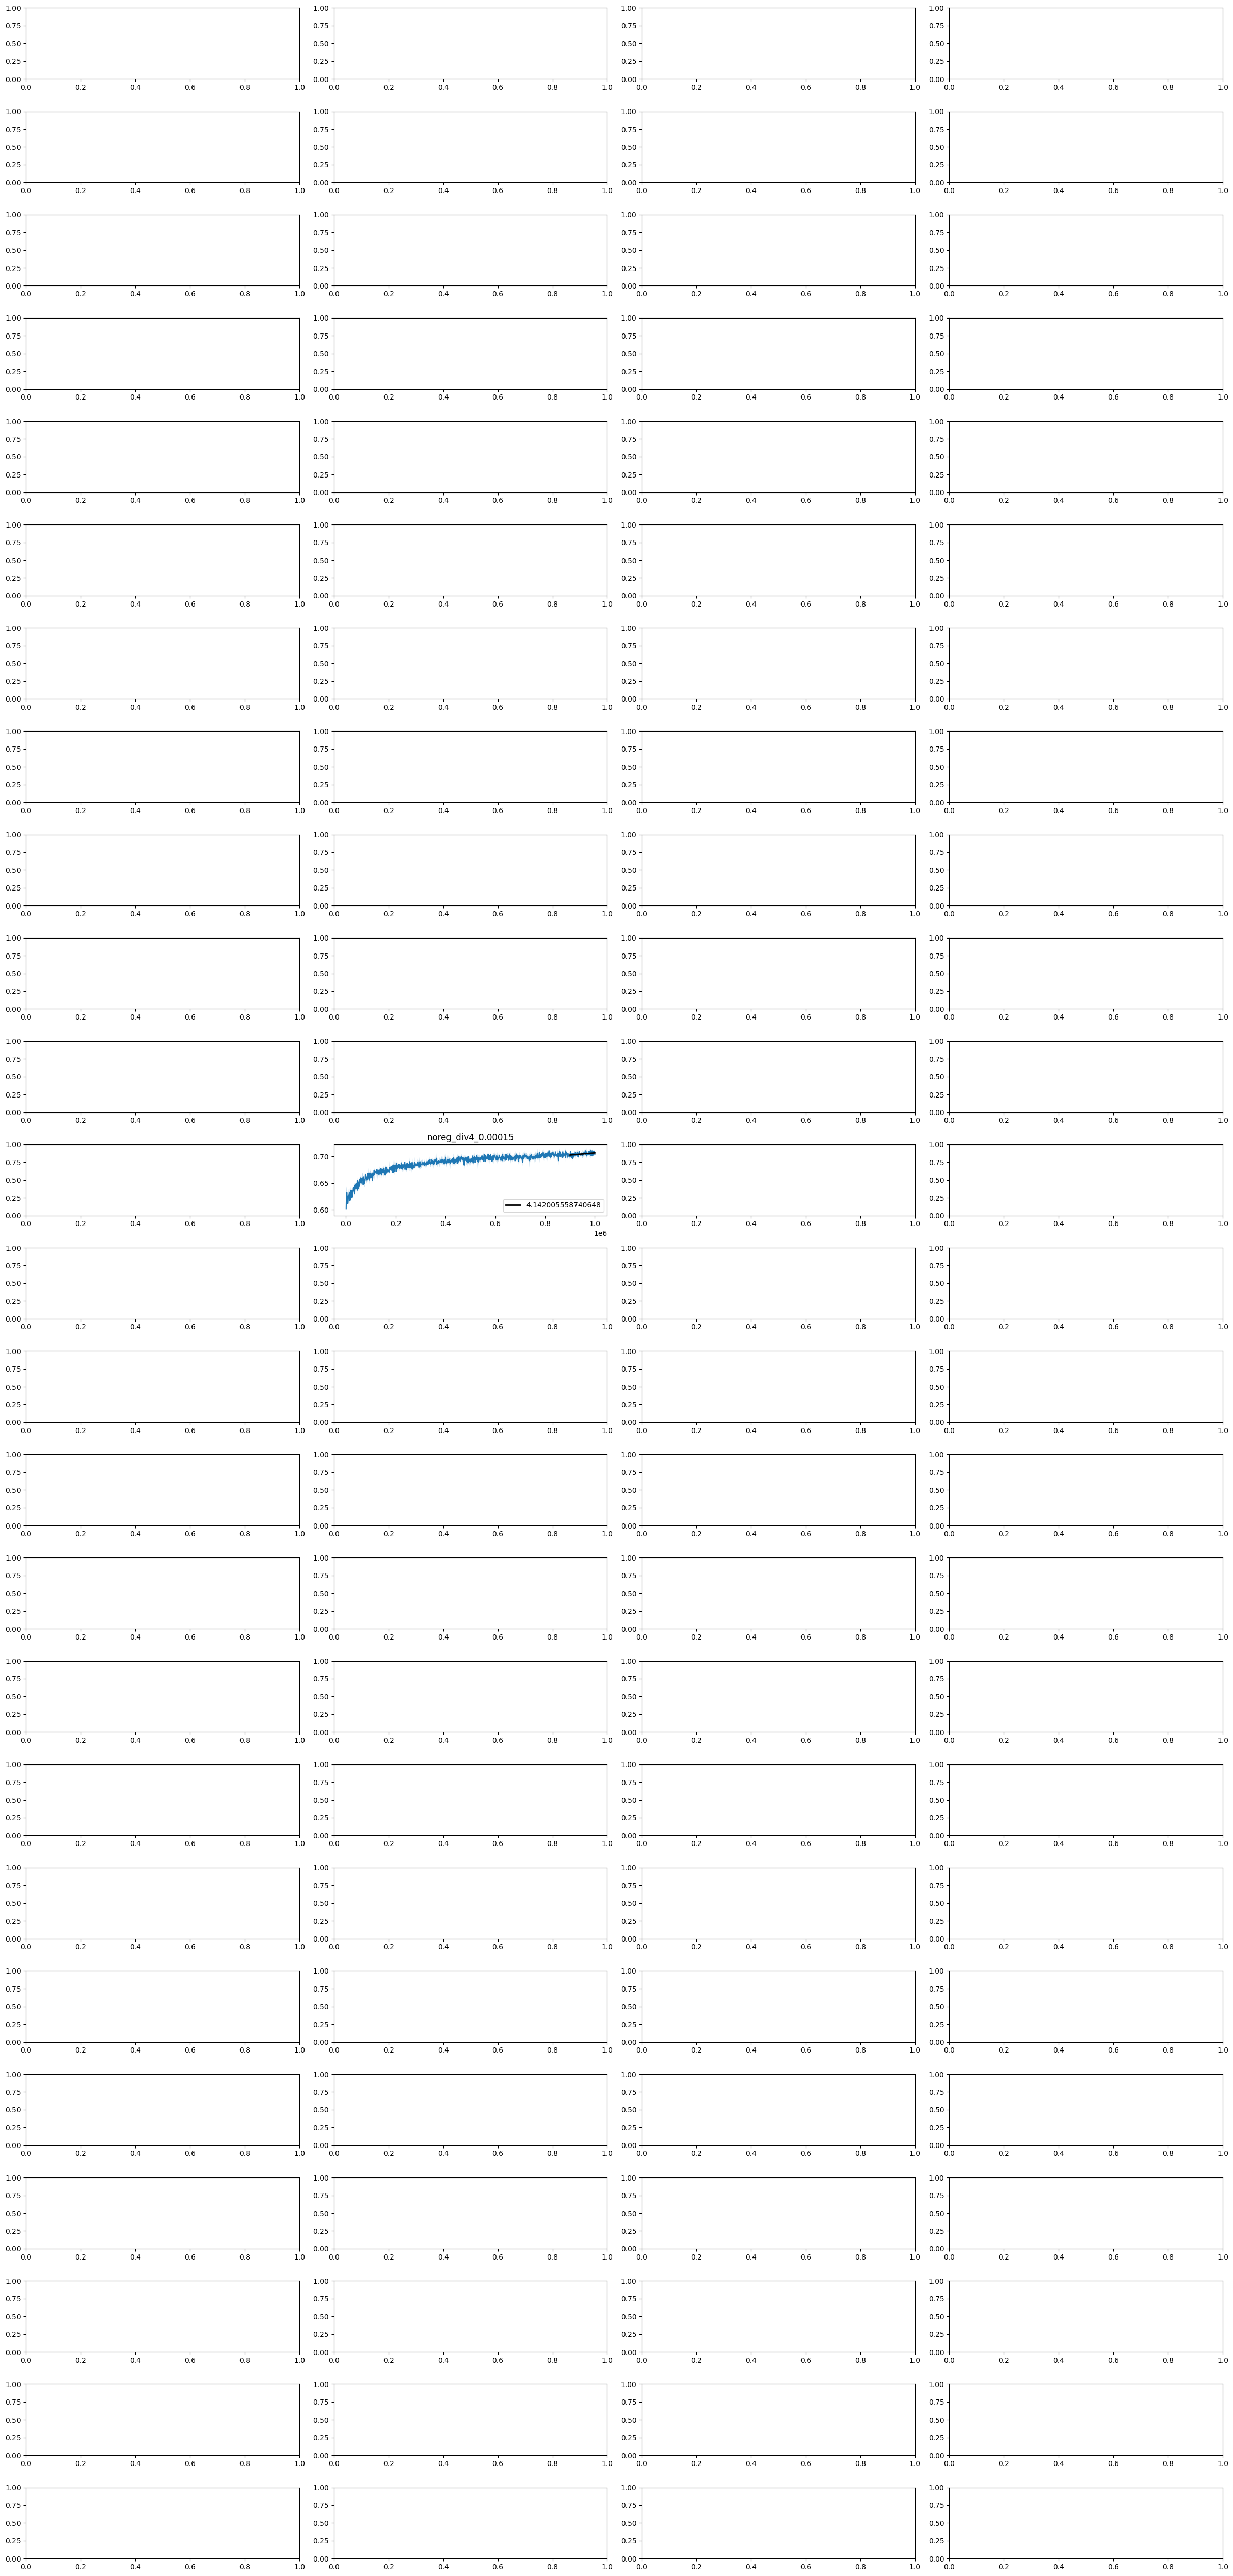

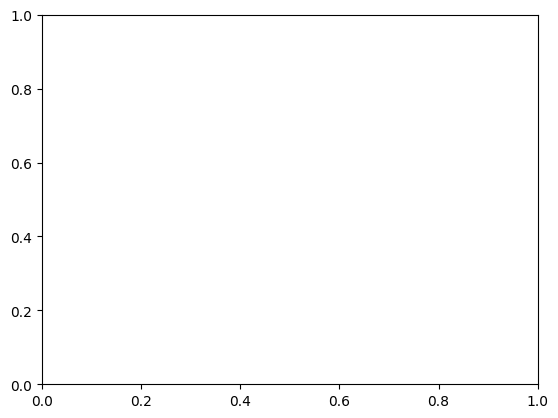

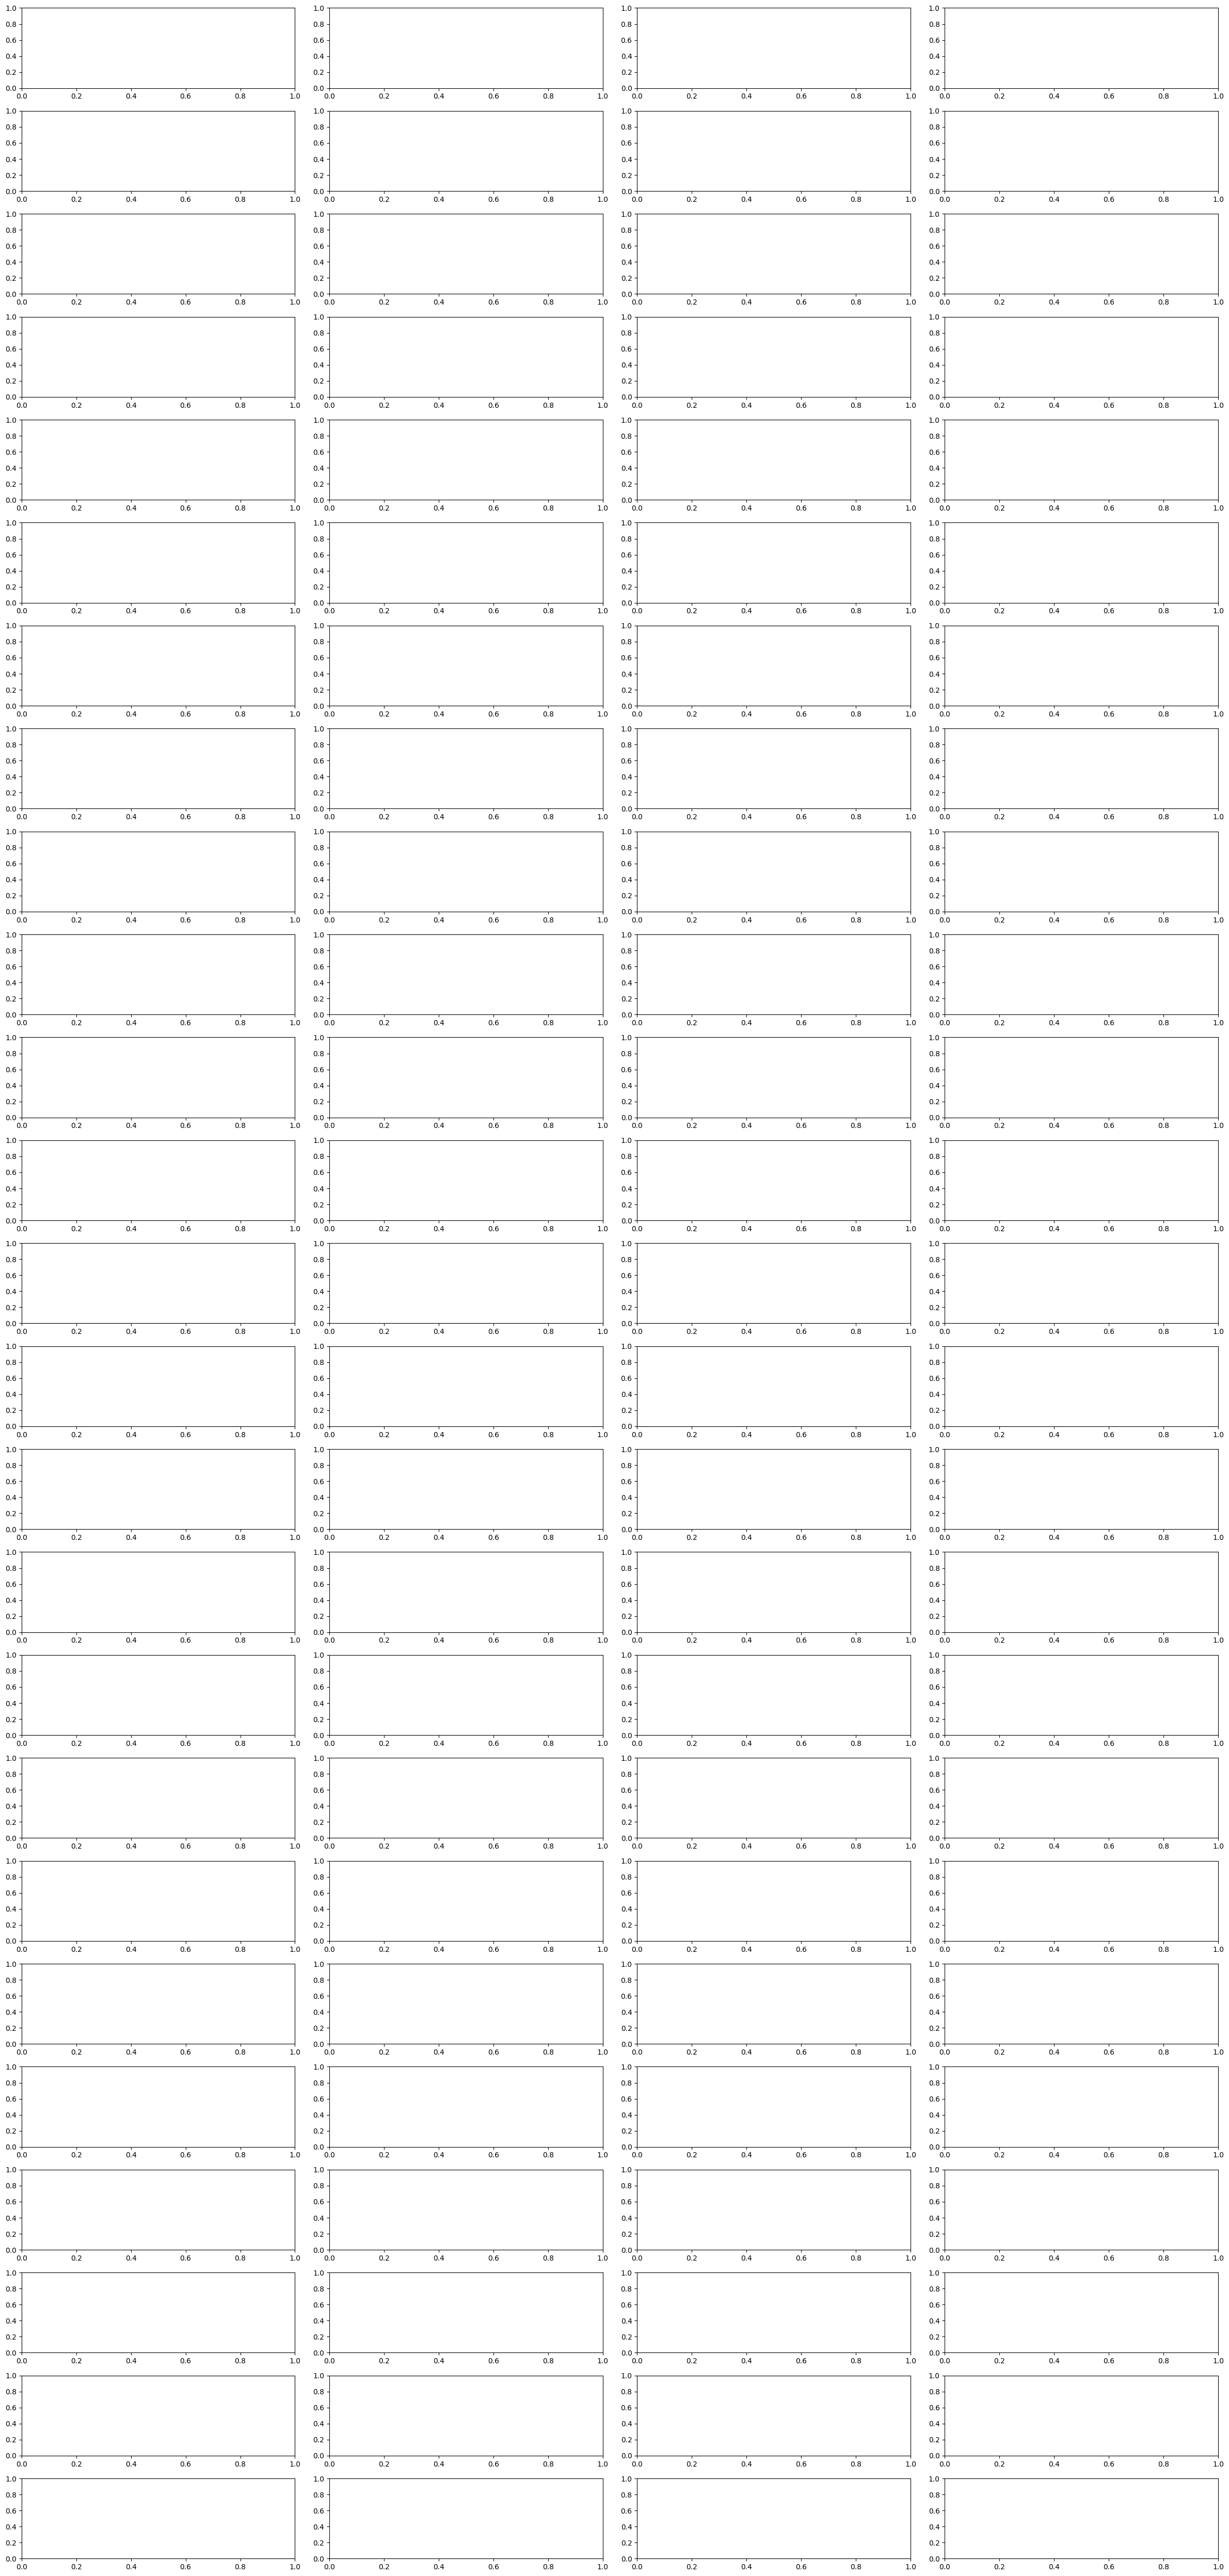

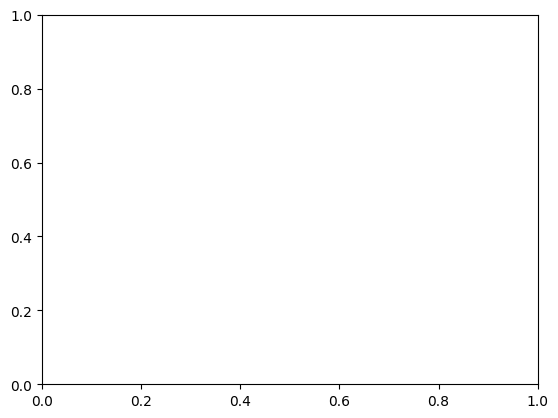

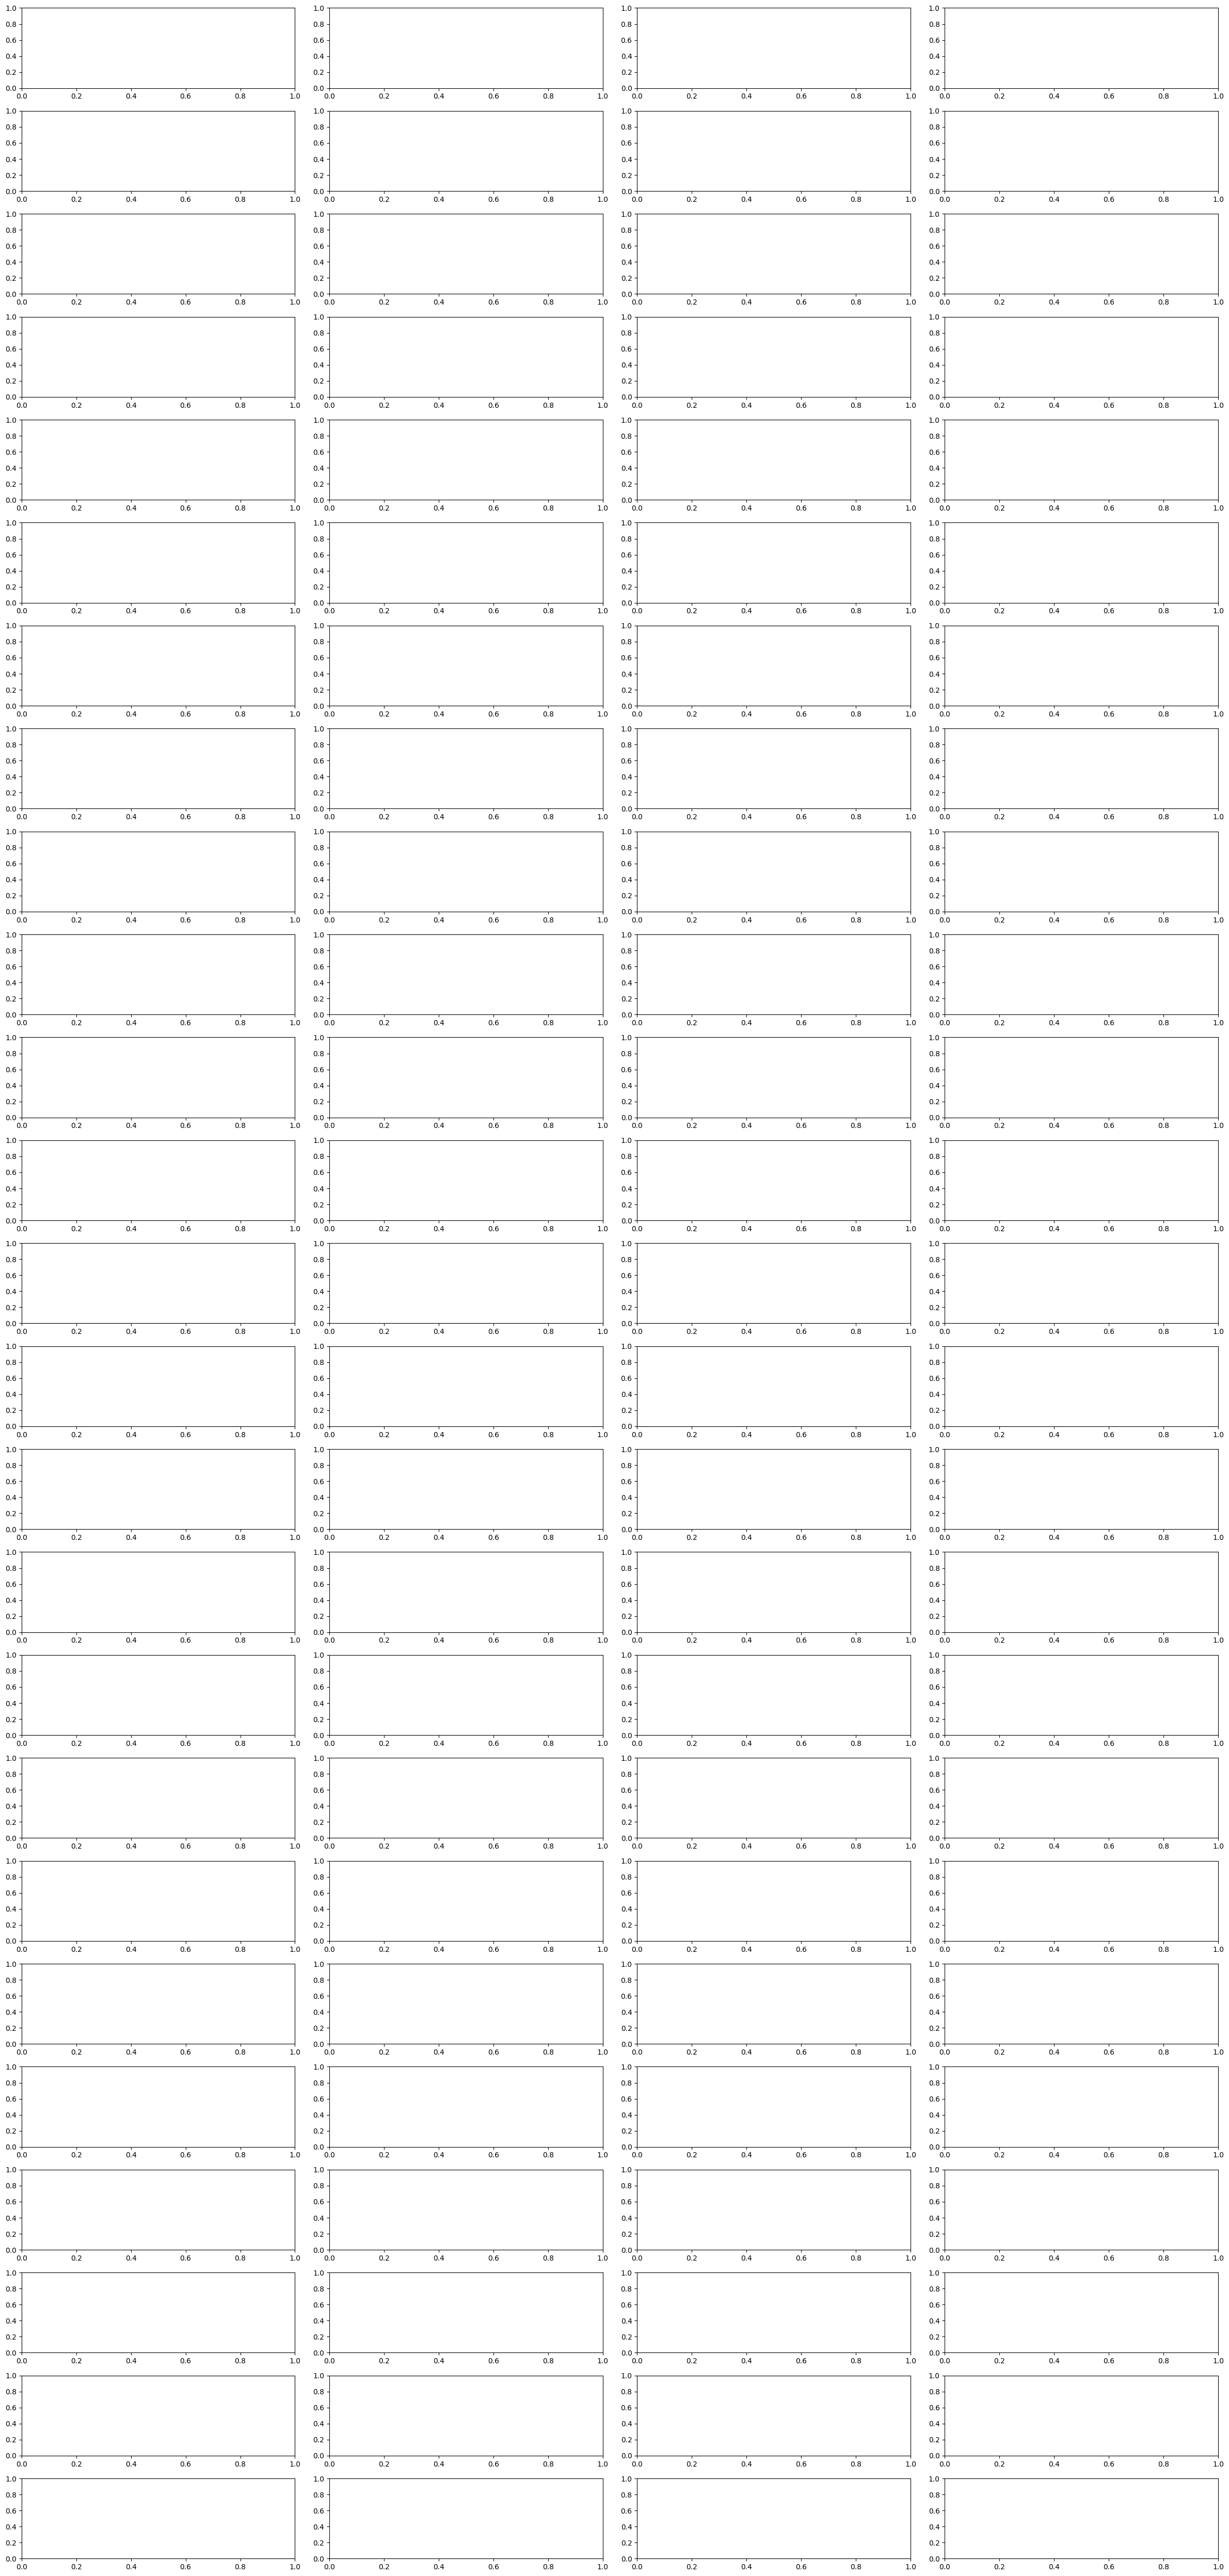

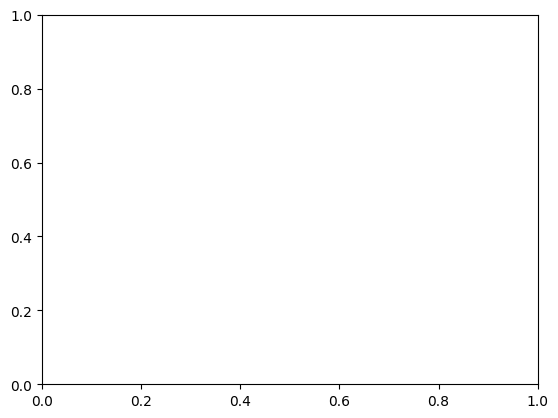

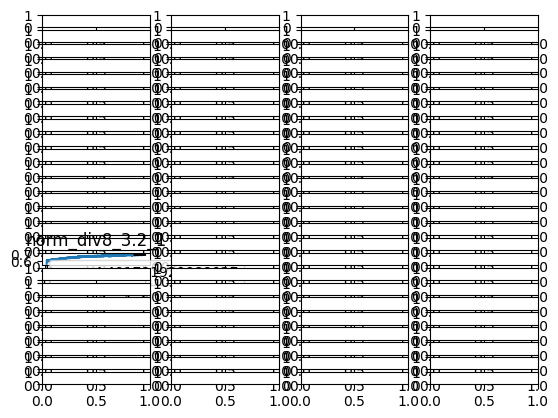

In [2]:
writer = write(name="a_wbn",path="../../run/adam_wbn",h=12,max_tasks=20)

fig,axs = plt.subplots(nrows=25,ncols=4)
cur_col = 0
setting = "adam_wbn"
for exp in os.listdir(f"../../data/{setting}"):

    if os.path.exists(os.path.join(f"../../data/{setting}",exp,"settings.json")):
        continue

    hyperparams = list(os.listdir(os.path.join(f"../../data/{setting}",exp)))

    for row,hyperparam in enumerate(hyperparams):
        if not os.path.exists(os.path.join(f"../../data/{setting}",exp,hyperparam,"test_stats")):
            axs[row][cur_col].set_title(exp + "_" + hyperparam)
            continue
        path = os.path.join(f"../../data/{setting}",exp,hyperparam)
        stats = get_stats(path,"test_stats")
        last_vals = np.mean(np.stack(list(stats["acc"].values())[-100:],axis=0),axis=-1)
        last_keys = np.asanyarray(list(stats["acc"].keys())[-100:])
        m,b = np.polyfit(last_keys, last_vals, 1)
    

        if m*1e8>4:
            plot_step_stat(stats["acc"],axs[row][cur_col])
            axs[row][cur_col].set_title(exp + "_" + hyperparam)
            axs[row][cur_col].plot([last_keys[0],last_keys[-1]],[m*last_keys[0] + b,m*last_keys[-1]+ b],lw=2,color="black",label=str(m*1e8))
            axs[row][cur_col].legend()

            import json
            with open(os.path.join(f"../../data/{setting}",exp,hyperparam,"settings.json"),"r") as f:
                js = json.load(f)
            curr_steps = js["num_steps"]
            save_states = js["save_args"]["save_states_every"]
            writer.write(f"python code/main.py {os.path.join("./data",setting,exp,hyperparam)}/ --overwrite-num-steps {curr_steps + 200000} --overwrite-save-state {curr_steps + 200000} --overwrite-save-grad {-1} \n")

    cur_col += 1
    if cur_col >= 4:
        fig.set_size_inches(24,50)
        fig.tight_layout()
        plt.show()
        plt.clf()
        plt.cla()
        fig,axs = plt.subplots(nrows=25,ncols=4)
        cur_col = 0

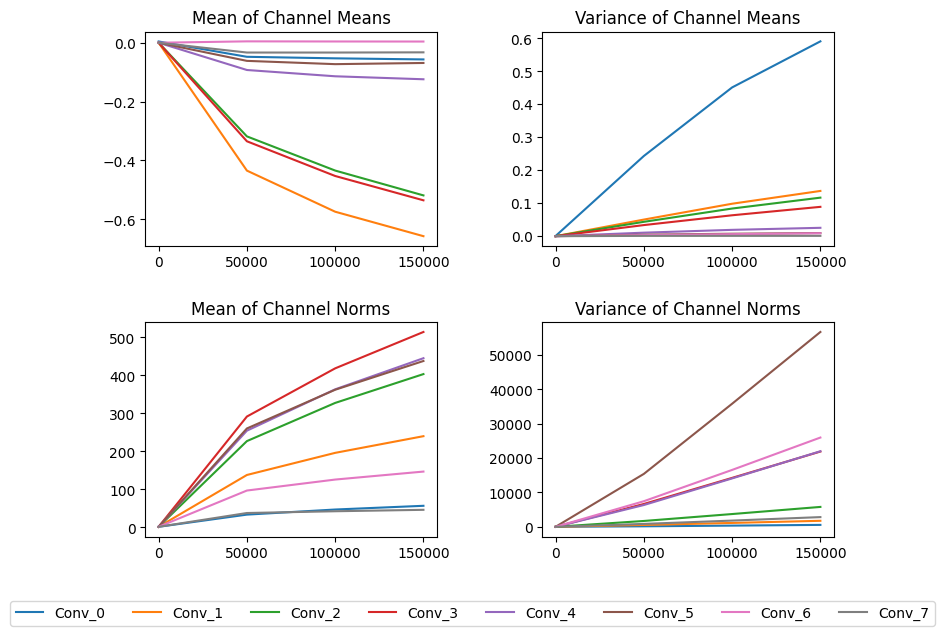

In [ ]:
fig,axs = plot_data("../../data/noreg/0.025", lambda d :     
                    {0 :    {
                            0 :  
                                ("Mean of Channel Means", d["cmean_mean"]) , 
                            1 :  
                                ("Variance of Channel Means", d["cmean_var"]) 
                            },
                    1 :    {
                            0 :  
                                ("Mean of Channel Norms", d["cnorm_mean"]) , 
                            1 :  
                                ("Variance of Channel Norms", d["cnorm_var"]) 
                            }})

fig.tight_layout()
fig.set_size_inches(8,6)
lines, labels = axs[0][0].get_legend_handles_labels()

fig.legend(lines, labels, loc='lower center', ncol=len(labels), bbox_to_anchor=(0.5,-0.08), bbox_transform=fig.transFigure)
fig.savefig("./images/noreg_0.025_cmeans_cnorms.png", bbox_inches='tight')